In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
seed = 42

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/MPHARM/00_MPH/Final/GBR_top 50.xlsx")
df

,pCC50,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
0,4.176200,15636.41,13368.86,12647.85,73.70,7.73,165.70,-11.62,-506.66,-0.29,...,26.61,5.91,16.06,3.79,0.65,28.44,6.94,7.23,9.64,6.39
1,3.790995,15824.56,13134.77,12632.15,93.29,7.74,-1041.46,-11.62,-169.43,0.24,...,26.61,5.91,16.20,3.73,0.70,28.26,6.93,7.21,9.64,6.39
2,3.657321,15177.15,12317.10,12769.65,66.82,7.81,625.33,-10.44,-200.90,-0.54,...,25.64,4.46,15.93,3.78,0.73,28.34,6.95,7.24,9.64,6.25
3,3.871568,15467.28,12693.43,12644.31,69.87,7.73,1303.94,-11.62,-211.73,-0.29,...,26.61,5.91,15.93,3.78,0.73,29.51,6.95,7.24,9.64,6.39
4,4.356745,16615.33,14778.77,12555.79,124.38,7.82,257.46,-13.30,-608.50,-0.59,...,28.03,6.67,16.42,4.08,0.36,32.17,7.05,7.33,9.64,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.700929,19331.54,15279.07,13757.04,95.22,7.69,-219.27,0.96,495.15,0.03,...,32.72,5.55,17.69,4.41,0.61,31.37,6.78,7.06,12.61,6.26
96,4.499078,20017.91,15543.37,14202.13,72.32,7.60,-1096.06,-2.41,654.35,0.25,...,33.09,4.82,17.69,4.12,0.98,27.86,6.78,7.06,12.61,6.79
97,4.376441,20721.68,15690.38,15499.24,69.66,7.72,-1057.40,-42.93,383.56,-0.10,...,33.57,4.80,18.04,4.53,0.61,27.63,6.85,7.15,12.61,5.39
98,3.980344,21494.07,16703.89,13819.99,89.89,7.73,-1101.02,129.21,351.95,-0.23,...,34.46,7.17,22.04,4.30,0.45,29.66,7.32,7.65,15.21,5.49


In [ ]:
print(df.columns)

Index(['pCC50', 'ATS4v', 'ATS7v', 'ATS6i', 'AATS6m', 'AATS3e', 'ATSC8m',
       'ATSC1v', 'ATSC5v', 'ATSC3e', 'ATSC8e', 'ATSC4i', 'AATSC3m', 'AATSC6m',
       'AATSC1v', 'AATSC7v', 'AATSC2e', 'AATSC8e', 'AATSC6p', 'MATS1c',
       'MATS2c', 'MATS3c', 'MATS7c', 'MATS1m', 'MATS7m', 'MATS3e', 'MATS4e',
       'MATS6e', 'MATS7e', 'MATS8e', 'MATS3p', 'MATS4p', 'MATS6p', 'GATS4m',
       'GATS6m', 'GATS2v', 'GATS6v', 'GATS8v', 'GATS7e', 'GATS7p', 'GATS7i',
       'Sp', 'CrippenLogP', 'SpMAD_Dt', 'IC2', 'CIC3', 'ZMIC4', 'piPC8',
       'piPC9', 'WTPT-5', 'XLogP'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pCC50        100 non-null    float64
 1   ATS4v        100 non-null    float64
 2   ATS7v        100 non-null    float64
 3   ATS6i        100 non-null    float64
 4   AATS6m       100 non-null    float64
 5   AATS3e       100 non-null    float64
 6   ATSC8m       100 non-null    float64
 7   ATSC1v       100 non-null    float64
 8   ATSC5v       100 non-null    float64
 9   ATSC3e       100 non-null    float64
 10  ATSC8e       100 non-null    float64
 11  ATSC4i       100 non-null    float64
 12  AATSC3m      100 non-null    float64
 13  AATSC6m      100 non-null    float64
 14  AATSC1v      100 non-null    float64
 15  AATSC7v      100 non-null    float64
 16  AATSC2e      100 non-null    float64
 17  AATSC8e      100 non-null    float64
 18  AATSC6p      100 non-null    float64
 19  MATS1c   

In [ ]:
df.isnull()

,pCC50,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

pCC50          0
ATS4v          0
ATS7v          0
ATS6i          0
AATS6m         0
AATS3e         0
ATSC8m         0
ATSC1v         0
ATSC5v         0
ATSC3e         0
ATSC8e         0
ATSC4i         0
AATSC3m        0
AATSC6m        0
AATSC1v        0
AATSC7v        0
AATSC2e        0
AATSC8e        0
AATSC6p        0
MATS1c         0
MATS2c         0
MATS3c         0
MATS7c         0
MATS1m         0
MATS7m         0
MATS3e         0
MATS4e         0
MATS6e         0
MATS7e         0
MATS8e         0
MATS3p         0
MATS4p         0
MATS6p         0
GATS4m         0
GATS6m         0
GATS2v         0
GATS6v         0
GATS8v         0
GATS7e         0
GATS7p         0
GATS7i         0
Sp             0
CrippenLogP    0
SpMAD_Dt       0
IC2            0
CIC3           0
ZMIC4          0
piPC8          0
piPC9          0
WTPT-5         0
XLogP          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0) 
df2

,pCC50,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
0,4.176200,15636.41,13368.86,12647.85,73.70,7.73,165.70,-11.62,-506.66,-0.29,...,26.61,5.91,16.06,3.79,0.65,28.44,6.94,7.23,9.64,6.39
1,3.790995,15824.56,13134.77,12632.15,93.29,7.74,-1041.46,-11.62,-169.43,0.24,...,26.61,5.91,16.20,3.73,0.70,28.26,6.93,7.21,9.64,6.39
2,3.657321,15177.15,12317.10,12769.65,66.82,7.81,625.33,-10.44,-200.90,-0.54,...,25.64,4.46,15.93,3.78,0.73,28.34,6.95,7.24,9.64,6.25
3,3.871568,15467.28,12693.43,12644.31,69.87,7.73,1303.94,-11.62,-211.73,-0.29,...,26.61,5.91,15.93,3.78,0.73,29.51,6.95,7.24,9.64,6.39
4,4.356745,16615.33,14778.77,12555.79,124.38,7.82,257.46,-13.30,-608.50,-0.59,...,28.03,6.67,16.42,4.08,0.36,32.17,7.05,7.33,9.64,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.700929,19331.54,15279.07,13757.04,95.22,7.69,-219.27,0.96,495.15,0.03,...,32.72,5.55,17.69,4.41,0.61,31.37,6.78,7.06,12.61,6.26
96,4.499078,20017.91,15543.37,14202.13,72.32,7.60,-1096.06,-2.41,654.35,0.25,...,33.09,4.82,17.69,4.12,0.98,27.86,6.78,7.06,12.61,6.79
97,4.376441,20721.68,15690.38,15499.24,69.66,7.72,-1057.40,-42.93,383.56,-0.10,...,33.57,4.80,18.04,4.53,0.61,27.63,6.85,7.15,12.61,5.39
98,3.980344,21494.07,16703.89,13819.99,89.89,7.73,-1101.02,129.21,351.95,-0.23,...,34.46,7.17,22.04,4.30,0.45,29.66,7.32,7.65,15.21,5.49


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pCC50        100 non-null    float64
 1   ATS4v        100 non-null    float64
 2   ATS7v        100 non-null    float64
 3   ATS6i        100 non-null    float64
 4   AATS6m       100 non-null    float64
 5   AATS3e       100 non-null    float64
 6   ATSC8m       100 non-null    float64
 7   ATSC1v       100 non-null    float64
 8   ATSC5v       100 non-null    float64
 9   ATSC3e       100 non-null    float64
 10  ATSC8e       100 non-null    float64
 11  ATSC4i       100 non-null    float64
 12  AATSC3m      100 non-null    float64
 13  AATSC6m      100 non-null    float64
 14  AATSC1v      100 non-null    float64
 15  AATSC7v      100 non-null    float64
 16  AATSC2e      100 non-null    float64
 17  AATSC8e      100 non-null    float64
 18  AATSC6p      100 non-null    float64
 19  MATS1c   

In [ ]:
df2.describe()

,pCC50,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,4.152151,16729.106600,13306.99270,12563.012000,80.625100,7.764500,-131.137800,5.792100,-122.787700,-0.332900,...,28.456900,5.194100,17.157400,4.083300,0.591900,28.550300,6.814900,7.090900,10.54910,5.668800
std,0.399805,2849.129892,2869.75821,2497.277906,21.368392,0.148442,597.967187,38.972077,489.319275,0.343021,...,3.704113,1.039737,2.332154,0.267061,0.182838,3.813412,0.446812,0.487163,1.45854,1.093768
min,3.443866,4146.150000,2015.08000,1341.670000,40.680000,7.470000,-1675.000000,-90.750000,-1287.330000,-1.180000,...,12.980000,0.520000,11.900000,3.360000,0.240000,19.180000,5.150000,5.300000,9.45000,3.310000
25%,3.794065,15757.325000,11971.59000,11531.057500,66.542500,7.677500,-578.817500,-13.142500,-421.387500,-0.590000,...,26.775000,4.672500,16.167500,3.897500,0.457500,26.592500,6.650000,6.820000,9.63750,4.962500
50%,4.278946,16949.575000,13861.29500,12638.230000,79.605000,7.740000,-10.300000,1.565000,-318.475000,-0.300000,...,29.070000,5.255000,17.130000,4.120000,0.600000,28.215000,6.890000,7.170000,9.65500,5.765000
75%,4.461207,18182.675000,14803.37500,14217.472500,94.190000,7.852500,227.192500,22.515000,147.122500,-0.070000,...,30.805000,5.910000,18.120000,4.310000,0.670000,30.500000,7.042500,7.345000,12.13000,6.415000
max,5.154902,22340.770000,22438.36000,17768.100000,149.060000,8.280000,1477.000000,129.800000,1149.320000,0.360000,...,35.210000,7.540000,23.730000,4.530000,1.100000,45.270000,7.750000,8.170000,15.21000,8.870000


In [ ]:
df2.head()

,pCC50,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
0,4.176200,15636.41,13368.86,12647.85,73.70,7.73,165.70,-11.62,-506.66,-0.29,...,26.61,5.91,16.06,3.79,0.65,28.44,6.94,7.23,9.64,6.39
1,3.790995,15824.56,13134.77,12632.15,93.29,7.74,-1041.46,-11.62,-169.43,0.24,...,26.61,5.91,16.20,3.73,0.70,28.26,6.93,7.21,9.64,6.39
2,3.657321,15177.15,12317.10,12769.65,66.82,7.81,625.33,-10.44,-200.90,-0.54,...,25.64,4.46,15.93,3.78,0.73,28.34,6.95,7.24,9.64,6.25
3,3.871568,15467.28,12693.43,12644.31,69.87,7.73,1303.94,-11.62,-211.73,-0.29,...,26.61,5.91,15.93,3.78,0.73,29.51,6.95,7.24,9.64,6.39
4,4.356745,16615.33,14778.77,12555.79,124.38,7.82,257.46,-13.30,-608.50,-0.59,...,28.03,6.67,16.42,4.08,0.36,32.17,7.05,7.33,9.64,6.19


In [ ]:
df2.describe()

,pCC50,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,4.152151,16729.106600,13306.99270,12563.012000,80.625100,7.764500,-131.137800,5.792100,-122.787700,-0.332900,...,28.456900,5.194100,17.157400,4.083300,0.591900,28.550300,6.814900,7.090900,10.54910,5.668800
std,0.399805,2849.129892,2869.75821,2497.277906,21.368392,0.148442,597.967187,38.972077,489.319275,0.343021,...,3.704113,1.039737,2.332154,0.267061,0.182838,3.813412,0.446812,0.487163,1.45854,1.093768
min,3.443866,4146.150000,2015.08000,1341.670000,40.680000,7.470000,-1675.000000,-90.750000,-1287.330000,-1.180000,...,12.980000,0.520000,11.900000,3.360000,0.240000,19.180000,5.150000,5.300000,9.45000,3.310000
25%,3.794065,15757.325000,11971.59000,11531.057500,66.542500,7.677500,-578.817500,-13.142500,-421.387500,-0.590000,...,26.775000,4.672500,16.167500,3.897500,0.457500,26.592500,6.650000,6.820000,9.63750,4.962500
50%,4.278946,16949.575000,13861.29500,12638.230000,79.605000,7.740000,-10.300000,1.565000,-318.475000,-0.300000,...,29.070000,5.255000,17.130000,4.120000,0.600000,28.215000,6.890000,7.170000,9.65500,5.765000
75%,4.461207,18182.675000,14803.37500,14217.472500,94.190000,7.852500,227.192500,22.515000,147.122500,-0.070000,...,30.805000,5.910000,18.120000,4.310000,0.670000,30.500000,7.042500,7.345000,12.13000,6.415000
max,5.154902,22340.770000,22438.36000,17768.100000,149.060000,8.280000,1477.000000,129.800000,1149.320000,0.360000,...,35.210000,7.540000,23.730000,4.530000,1.100000,45.270000,7.750000,8.170000,15.21000,8.870000


In [ ]:
X = df2.drop(['pCC50'],axis = 1)
X

,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,ATSC8e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
0,15636.41,13368.86,12647.85,73.70,7.73,165.70,-11.62,-506.66,-0.29,0.18,...,26.61,5.91,16.06,3.79,0.65,28.44,6.94,7.23,9.64,6.39
1,15824.56,13134.77,12632.15,93.29,7.74,-1041.46,-11.62,-169.43,0.24,-0.37,...,26.61,5.91,16.20,3.73,0.70,28.26,6.93,7.21,9.64,6.39
2,15177.15,12317.10,12769.65,66.82,7.81,625.33,-10.44,-200.90,-0.54,1.32,...,25.64,4.46,15.93,3.78,0.73,28.34,6.95,7.24,9.64,6.25
3,15467.28,12693.43,12644.31,69.87,7.73,1303.94,-11.62,-211.73,-0.29,0.90,...,26.61,5.91,15.93,3.78,0.73,29.51,6.95,7.24,9.64,6.39
4,16615.33,14778.77,12555.79,124.38,7.82,257.46,-13.30,-608.50,-0.59,0.18,...,28.03,6.67,16.42,4.08,0.36,32.17,7.05,7.33,9.64,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19331.54,15279.07,13757.04,95.22,7.69,-219.27,0.96,495.15,0.03,-0.49,...,32.72,5.55,17.69,4.41,0.61,31.37,6.78,7.06,12.61,6.26
96,20017.91,15543.37,14202.13,72.32,7.60,-1096.06,-2.41,654.35,0.25,-0.81,...,33.09,4.82,17.69,4.12,0.98,27.86,6.78,7.06,12.61,6.79
97,20721.68,15690.38,15499.24,69.66,7.72,-1057.40,-42.93,383.56,-0.10,-0.67,...,33.57,4.80,18.04,4.53,0.61,27.63,6.85,7.15,12.61,5.39
98,21494.07,16703.89,13819.99,89.89,7.73,-1101.02,129.21,351.95,-0.23,-0.60,...,34.46,7.17,22.04,4.30,0.45,29.66,7.32,7.65,15.21,5.49


In [ ]:
Y = df2.pCC50
Y

0     4.176200
1     3.790995
2     3.657321
3     3.871568
4     4.356745
        ...   
95    4.700929
96    4.499078
97    4.376441
98    3.980344
99    4.311669
Name: pCC50, Length: 100, dtype: float64

In [ ]:
X.shape

(100, 50)

In [ ]:
Y.shape

(100,)

In [ ]:
corr = df2.corr()

In [ ]:
corr

,pCC50,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
pCC50,1.000000,0.372954,0.410464,0.406736,-0.058568,-0.391591,0.112860,0.115908,-0.037603,0.313824,...,0.332665,0.440497,0.274081,0.024113,0.128545,0.078672,0.480084,0.490147,0.111401,0.471954
ATS4v,0.372954,1.000000,0.840150,0.783638,0.069174,-0.384683,-0.127440,0.439156,-0.056521,0.045255,...,0.961252,0.584861,0.843454,0.451629,0.227074,0.282645,0.810933,0.782649,0.382929,0.547615
ATS7v,0.410464,0.840150,1.000000,0.827412,-0.008384,-0.441972,-0.201162,0.359114,-0.103879,0.176254,...,0.749501,0.650478,0.530071,0.245031,0.197059,0.222062,0.862833,0.861315,0.333938,0.646746
ATS6i,0.406736,0.783638,0.827412,1.000000,-0.414827,-0.618222,-0.095459,0.310623,-0.385374,0.230024,...,0.632025,0.466284,0.502507,0.123508,0.334111,-0.140226,0.826976,0.824527,0.073462,0.631881
AATS6m,-0.058568,0.069174,-0.008384,-0.414827,1.000000,0.521093,0.090598,0.109937,0.201035,-0.307706,...,0.225772,0.227617,0.241219,0.281371,-0.288170,0.794957,-0.062203,-0.100163,0.231436,-0.099572
AATS3e,-0.391591,-0.384683,-0.441972,-0.618222,0.521093,1.000000,0.181163,-0.236690,-0.034402,-0.588498,...,-0.321583,-0.411227,-0.168616,0.301635,-0.585220,0.263631,-0.482787,-0.488656,-0.002762,-0.704238
ATSC8m,0.112860,-0.127440,-0.201162,-0.095459,0.090598,0.181163,1.000000,0.075327,-0.355139,-0.284805,...,-0.147992,0.035355,0.064017,-0.095558,-0.154365,0.035294,0.050805,0.035939,-0.316147,-0.079831
ATSC1v,0.115908,0.439156,0.359114,0.310623,0.109937,-0.236690,0.075327,1.000000,-0.109534,-0.080740,...,0.412009,0.296963,0.611081,0.037468,0.042506,0.089431,0.530737,0.507880,0.284735,0.240824
ATSC5v,-0.037603,-0.056521,-0.103879,-0.385374,0.201035,-0.034402,-0.355139,-0.109534,1.000000,0.206630,...,0.082469,-0.048754,-0.085819,0.154961,0.011411,0.203599,-0.276828,-0.268739,0.515520,-0.094879
ATSC3e,0.313824,0.045255,0.176254,0.230024,-0.307706,-0.588498,-0.284805,-0.080740,0.206630,1.000000,...,-0.018465,0.082388,-0.150664,-0.297630,0.374223,-0.260556,0.089099,0.140034,0.028805,0.500538


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,pCC50,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,ATSC8e,ATSC4i,AATSC3m,AATSC6m,AATSC1v,AATSC7v,AATSC2e,AATSC8e,AATSC6p,MATS1c,MATS2c,MATS3c,MATS7c,MATS1m,MATS7m,MATS3e,MATS4e,MATS6e,MATS7e,MATS8e,MATS3p,MATS4p,MATS6p,GATS4m,GATS6m,GATS2v,GATS6v,GATS8v,GATS7e,GATS7p,GATS7i,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
pCC50,1.000000,0.372954,0.410464,0.406736,-0.058568,-0.391591,0.112860,0.115908,-0.037603,0.313824,0.107237,-0.245659,-0.149824,-0.102039,0.139201,0.037032,-0.218228,0.070260,-0.086924,0.191673,-0.176510,0.151965,-0.059154,0.057611,-0.157977,0.285190,0.214754,-0.096521,-0.005473,0.075964,-0.178379,0.302492,-0.050010,-0.380954,0.025360,-0.173788,0.048643,0.075835,-0.014186,0.087074,-0.198062,0.332665,0.440497,0.274081,0.024113,0.128545,0.078672,0.480084,0.490147,0.111401,0.471954
ATS4v,0.372954,1.000000,0.840150,0.783638,0.069174,-0.384683,-0.127440,0.439156,-0.056521,0.045255,-0.300324,-0.323111,0.110102,-0.123844,0.452880,0.338965,0.224290,-0.277411,-0.135238,-0.424718,0.485807,-0.218718,0.065269,-0.040531,-0.038312,0.307958,0.196991,-0.195380,-0.091906,-0.362395,0.202600,0.313450,-0.163528,-0.070128,0.377969,-0.022544,0.257879,0.085126,0.397905,0.118090,0.203771,0.961252,0.584861,0.843454,0.451629,0.227074,0.282645,0.810933,0.782649,0.382929,0.547615
ATS7v,0.410464,0.840150,1.000000,0.827412,-0.008384,-0.441972,-0.201162,0.359114,-0.103879,0.176254,-0.274014,-0.238966,-0.027113,-0.191792,0.391678,0.115306,0.156809,-0.234862,-0.109715,-0.215120,0.221081,-0.114957,0.320101,-0.266956,0.031041,0.368847,0.203216,-0.139532,0.225219,-0.298353,-0.016449,0.567824,-0.115633,-0.437861,0.277795,-0.185587,0.166657,0.287601,-0.031278,0.140553,0.024283,0.749501,0.650478,0.530071,0.245031,0.197059,0.222062,0.862833,0.861315,0.333938,0.646746
ATS6i,0.406736,0.783638,0.827412,1.000000,-0.414827,-0.618222,-0.095459,0.310623,-0.385374,0.230024,-0.168521,-0.217821,0.302084,0.093533,0.338591,-0.081867,0.075579,-0.142443,0.189005,0.024625,-0.006426,-0.043684,0.118523,0.000549,-0.252981,0.464620,0.315659,0.004056,0.005799,-0.207954,0.055093,0.534696,0.175579,-0.241074,0.322209,-0.088929,0.016695,0.240450,-0.019708,0.303958,0.124906,0.632025,0.466284,0.502507,0.123508,0.334111,-0.140226,0.826976,0.824527,0.073462,0.631881
AATS6m,-0.058568,0.069174,-0.008384,-0.414827,1.000000,0.521093,0.090598,0.109937,0.201035,-0.307706,-0.089943,0.033115,-0.498668,-0.128464,0.125620,0.458327,0.102460,-0.053066,-0.315804,-0.489753,0.503520,-0.172156,-0.023900,-0.160682,0.391458,-0.343364,-0.189795,-0.088389,0.037723,-0.024501,0.169708,-0.303150,-0.339350,0.066314,-0.276121,0.099489,0.089374,-0.356668,0.335421,-0.408984,-0.100894,0.225772,0.227617,0.241219,0.281371,-0.288170,0.794957,-0.062203,-0.100163,0.231436,-0.099572
AATS3e,-0.391591,-0.384683,-0.441972,-0.618222,0.521093,1.000000,0.181163,-0.236690,-0.034402,-0.588498,0.108256,0.325823,-0.176451,0.106183,-0.248048,0.241941,0.043543,0.136607,-0.053475,-0.122174,0.129087,-0.288021,-0.051503,-0.085512,0.548054,-0.574020,-0.046723,0.344961,0.208059,0.230624,0.215205,-0.372641,-0.096516,0.230666,-0.323475,0.030491,0.012567,-0.339122,0.098511,-0.295214,-0.109843,-0.321583,-0.411227,-0.168616,0.301635,-0.585220,0.263631,-0.482787,-0.488656,-0.002762,-0.704238
ATSC8m,0.112860,-0.127440,-0.201162,-0.095459,0.090598,0.181163,1.000000,0.075327,-0.355139,-0.284805,0.511396,0.201568,0.077824,0.396470,0.089033,-0.218969,-0.144749,0.501010,0.136738,0.275732,-0.200061,-0.119325,-0.510757,0.238383,-0.164876,-0.295316,0.052303,0.362175,-0.191487,0.644503,0.199909,-0.177262,0.117836,0.156341,-0.356903,0.148405,0.030047,-0.498258,0.164681,0.094466,0.035378,-0.147992,0.035355,0.064017,-0.095558,-0.154365,0.035294,0.050805,0.035939,-0.316147,-0.079831
ATSC1v,0.115908,0.439156,0.359114,0.310623,0.109937,-0.236690,0.075327,1.000000,-0.109534,-0.080740,-0.206661,-0.395397,0.002756,0.149234,0.987933,-0.064306,0.188979,-0.089585,0.138079,-0.179260,0.241448,-0.122264,0.068328,0.271477,-0.2

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=seed)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(80, 50) (20, 50) (80,) (20,)


In [ ]:
X_train

,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,ATSC8e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
55,17728.32,15767.71,15189.86,64.40,7.82,225.20,-16.54,-737.86,-0.53,-1.26,...,28.63,4.78,17.54,4.32,0.39,25.73,7.12,7.45,9.69,5.10
88,17066.10,14209.04,10482.85,94.18,7.74,-852.86,2.17,861.48,-0.16,-0.45,...,30.40,5.36,17.24,4.34,0.65,31.46,6.76,7.02,12.61,6.24
26,12680.34,9231.70,8923.86,79.76,8.14,-666.19,-90.75,-232.48,-0.14,-1.07,...,22.77,3.35,13.21,4.32,0.37,26.94,5.96,6.29,9.57,3.35
42,4146.15,2015.08,1341.67,149.06,8.28,0.18,4.68,-2.28,-0.07,0.01,...,12.98,0.52,11.90,3.52,0.29,26.76,5.15,5.30,9.47,3.31
69,16731.97,11765.75,11924.38,78.33,7.77,-136.23,21.81,-22.27,-0.80,-0.58,...,29.89,5.04,18.12,4.27,0.64,28.95,6.57,6.72,9.61,4.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,20675.48,14120.39,14052.84,102.67,7.69,754.98,54.08,-459.12,-0.24,0.20,...,33.41,6.22,22.84,4.00,0.61,30.56,7.47,7.83,9.65,6.80
71,16613.23,11773.81,10973.30,87.90,7.78,-266.68,21.81,-86.25,-0.36,-0.05,...,29.89,4.98,18.12,4.25,0.59,29.84,6.57,6.72,9.61,5.12
14,16889.34,14023.59,13819.72,68.59,7.81,586.41,-16.49,-379.87,-0.37,1.47,...,26.92,4.98,16.78,3.99,0.56,26.82,7.01,7.34,12.69,6.18
92,17195.32,14372.06,10454.16,102.82,7.71,-1049.14,2.91,875.93,-0.05,-0.52,...,30.92,5.47,17.24,4.34,0.65,33.90,6.76,7.02,12.61,6.57


In [ ]:
Y_train

55    4.479516
88    3.980344
26    4.311580
42    3.454174
69    3.797239
        ...   
60    4.515415
71    4.472757
14    4.316413
92    3.930369
51    4.434270
Name: pCC50, Length: 80, dtype: float64

In [ ]:
X_test

,ATS4v,ATS7v,ATS6i,AATS6m,AATS3e,ATSC8m,ATSC1v,ATSC5v,ATSC3e,ATSC8e,...,Sp,CrippenLogP,SpMAD_Dt,IC2,CIC3,ZMIC4,piPC8,piPC9,WTPT-5,XLogP
83,17755.40,14241.02,11557.98,108.21,7.71,499.91,2.91,1001.63,0.04,-0.23,...,30.92,5.52,17.49,4.32,0.43,32.55,6.77,7.04,12.61,5.94
53,16796.45,14656.62,13773.32,66.69,7.81,3.89,106.43,-320.59,-0.79,-0.99,...,27.41,4.09,17.17,4.26,0.39,25.30,7.09,7.42,12.11,4.05
70,16083.95,11585.64,11140.63,79.78,7.85,-438.62,22.93,-76.32,-0.32,0.36,...,28.91,4.47,18.12,4.25,0.59,28.77,6.57,6.72,9.61,4.98
45,14847.71,11842.85,13466.60,45.62,7.53,-68.73,24.31,-338.98,0.01,-0.07,...,25.76,4.99,16.08,3.75,0.69,23.06,6.84,7.11,9.68,6.40
44,9836.34,6470.83,7603.20,44.29,7.64,-322.43,-35.70,735.23,-0.24,-0.12,...,19.97,3.36,12.24,3.69,0.48,19.18,5.63,5.88,9.48,3.92
39,15029.78,12285.96,11710.56,113.60,7.76,1477.00,22.17,-435.73,-0.57,0.40,...,26.30,6.38,16.45,4.01,0.38,30.44,6.95,7.21,9.68,5.76
22,17889.98,16404.76,16039.97,59.88,7.52,-1091.43,-5.95,-320.71,0.24,-0.25,...,29.30,5.76,16.14,4.14,0.67,24.76,7.00,7.30,9.72,7.18
80,18754.30,12710.66,13272.80,79.60,7.98,20.51,-22.09,-336.63,-1.18,-0.41,...,30.68,4.08,19.47,4.43,0.58,28.21,6.68,6.86,12.68,4.79
10,18286.19,14877.19,14838.98,60.89,7.57,-703.77,-5.95,425.37,0.06,-0.15,...,29.30,5.31,16.24,3.81,0.81,25.81,6.99,7.31,9.64,7.15
0,15636.41,13368.86,12647.85,73.70,7.73,165.70,-11.62,-506.66,-0.29,0.18,...,26.61,5.91,16.06,3.79,0.65,28.44,6.94,7.23,9.64,6.39


In [ ]:
Y_test

83    4.566390
53    3.584192
70    4.421705
45    4.567993
44    3.505678
39    4.784891
22    4.271241
80    3.793255
10    4.255081
0     4.176200
18    3.742826
30    4.340750
73    4.092696
33    3.727857
90    5.154902
4     4.356745
76    4.377061
77    3.475799
12    4.353694
31    4.171598
Name: pCC50, dtype: float64

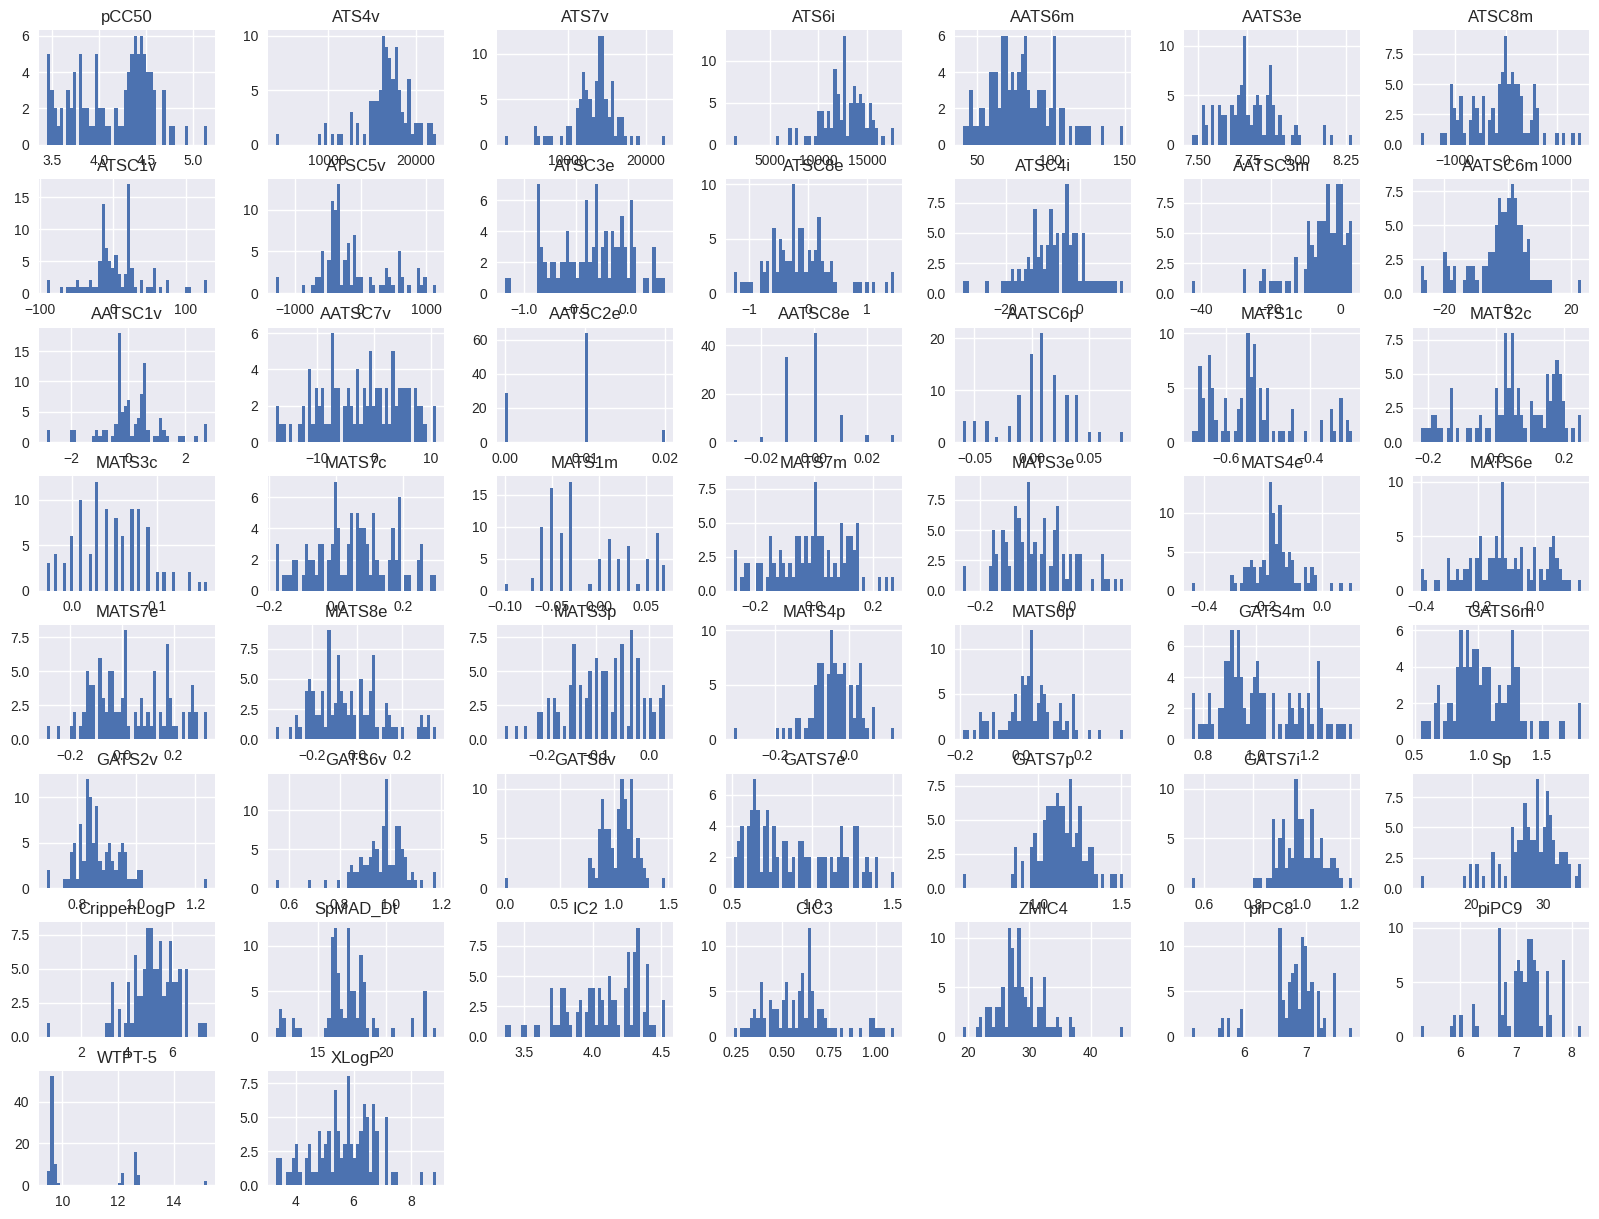

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.show()

In [ ]:
model = HistGradientBoostingRegressor(random_state=seed)

In [ ]:
model.fit(X_train, Y_train)

HistGradientBoostingRegressor(random_state=42)

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[4.37795784 3.95875314 3.98859609 3.54453008 3.73431119 3.94760385
 4.75385042 4.52592503 3.86914675 4.21365901 4.45347749 4.53275514
 4.57917212 4.4735443  4.43937493 4.38523752 3.54525966 3.5133235
 4.60700997 3.97573952 4.55139443 4.18569317 4.28752929 4.65177236
 3.95226165 3.53221208 3.63208971 3.64462487 4.50380412 4.03128674
 3.84384772 3.87515457 3.65016536 4.66893288 4.14187504 3.64158349
 4.39580402 3.52410685 4.28047586 4.06740333 3.92452944 4.26656949
 3.88113632 3.69897398 4.53601379 3.72019376 4.40420474 3.58425219
 4.5835191  4.41000684 4.28269109 4.31738731 4.45671579 4.04771291
 4.13755413 4.38081706 3.88927415 4.0352788  4.5346335  4.47023985
 4.4575334  4.0778821  4.22421967 4.13386235 3.81612382 4.33301566
 4.35714924 3.76102759 4.38832085 4.0195685  4.13307291 3.86030041
 3.80969393 4.24537216 4.31533526 4.5396219  4.21747484 4.25099792
 4.08568196 4.4253318 ]


In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
55,4.479516,4.377958
88,3.980344,3.958753
26,4.311580,3.988596
42,3.454174,3.544530
69,3.797239,3.734311
...,...,...
60,4.515415,4.539622
71,4.472757,4.217475
14,4.316413,4.250998
92,3.930369,4.085682


In [ ]:
len(Y_train_pred)

80

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.9166


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.0900


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.1124


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.9166


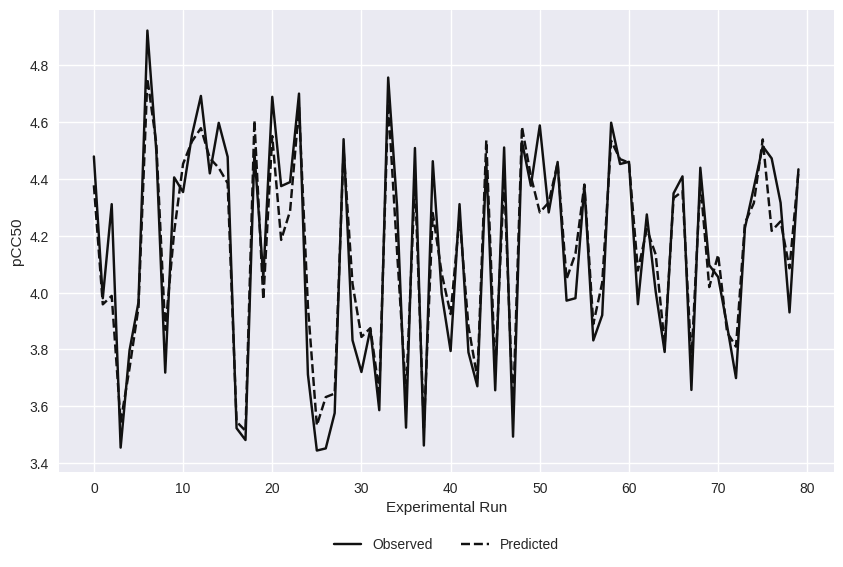

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([4.2778472 , 4.03551673, 3.95130093, 4.36424764, 3.56285443,
       4.71391679, 4.27226491, 3.8251362 , 4.21571051, 4.18849013,
       3.49466356, 4.10310814, 4.09166123, 3.92834563, 3.96791977,
       4.36602085, 3.58369114, 3.63731704, 4.33784952, 4.11621036])

In [ ]:
len(Y_test_pred)

20

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
83,4.566390,4.277847
53,3.584192,4.035517
70,4.421705,3.951301
45,4.567993,4.364248
44,3.505678,3.562854
39,4.784891,4.713917
22,4.271241,4.272265
80,3.793255,3.825136
10,4.255081,4.215711
0,4.176200,4.188490


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.2411


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.2411


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.2268


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.3733


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))

The EVS is: 0.3394


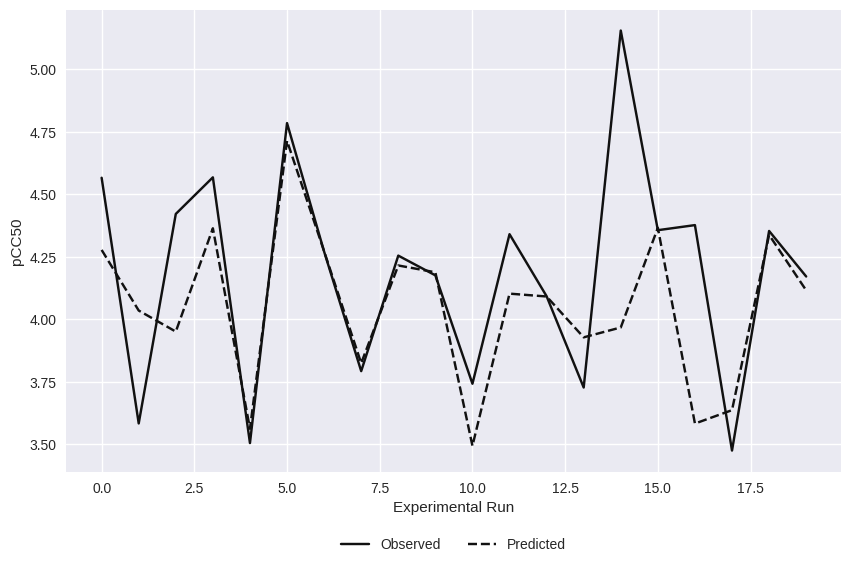

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

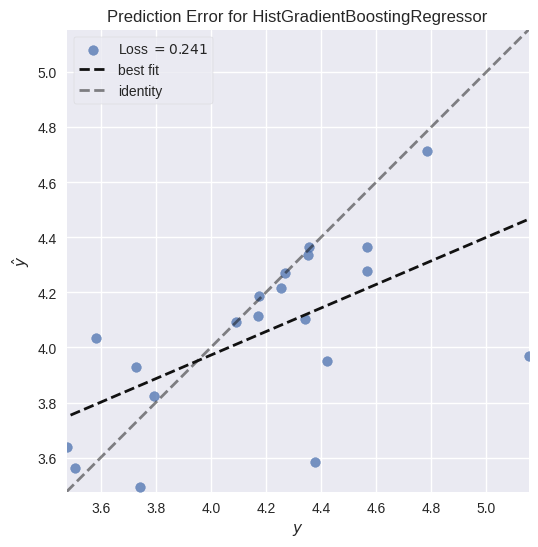

<Axes: title={'center': 'Prediction Error for HistGradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

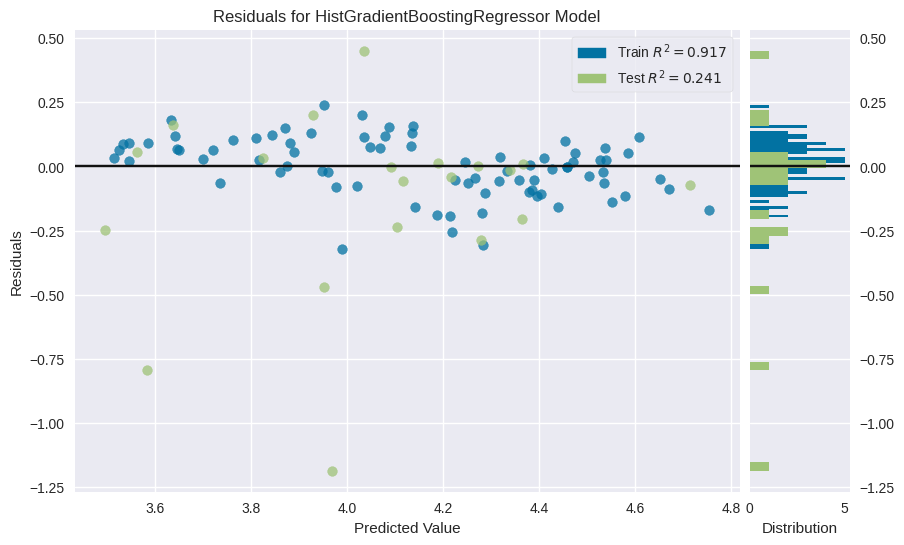

<Axes: title={'center': 'Residuals for HistGradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

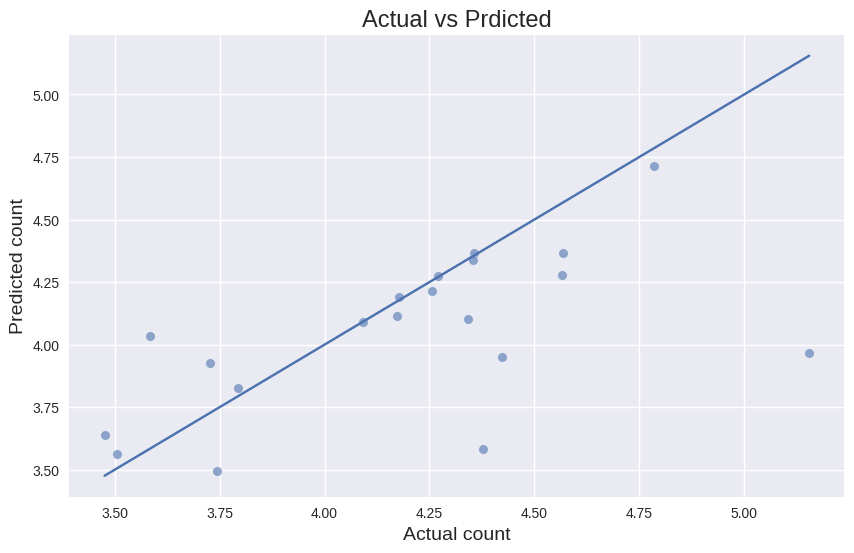

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Prdicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.2411148149301081

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.37

In [ ]:
my_param_grid = {'max_leaf_nodes':[7,8,9], 'max_depth':[6,7,8], 'min_samples_leaf': [3,4,5]} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=HistGradientBoostingRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [6, 7, 8], 'max_leaf_nodes': [7, 8, 9],
                         'min_samples_leaf': [3, 4, 5]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=HistGradientBoostingRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=0.487 total time=   0.2s
[CV 2/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=0.511 total time=   0.2s
[CV 3/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=0.443 total time=   0.2s
[CV 4/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=-0.506 total time=   0.2s
[CV 5/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=0.334 total time=   0.2s
[CV 1/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=0.498 total time=   0.2s
[CV 2/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=0.492 total time=   0.1s
[CV 3/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=0.344 total time=   0.2s
[CV 4/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=-0.319 total time=   0.1s
[CV 5/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=0

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [6, 7, 8], 'max_leaf_nodes': [7, 8, 9],
                         'min_samples_leaf': [3, 4, 5]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 6, 'max_leaf_nodes': 7, 'min_samples_leaf': 4}

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([4.38140336, 4.03521635, 4.04024215, 4.4970725 , 3.61605963,
       4.83467152, 4.28196422, 4.09782377, 4.22782229, 4.24033634,
       3.6013908 , 3.99328867, 4.29610367, 3.93043464, 4.08286703,
       4.44841164, 3.66278629, 3.70275575, 4.35464703, 4.02996489])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
83,4.566390,4.277847,4.381403
53,3.584192,4.035517,4.035216
70,4.421705,3.951301,4.040242
45,4.567993,4.364248,4.497073
44,3.505678,3.562854,3.616060


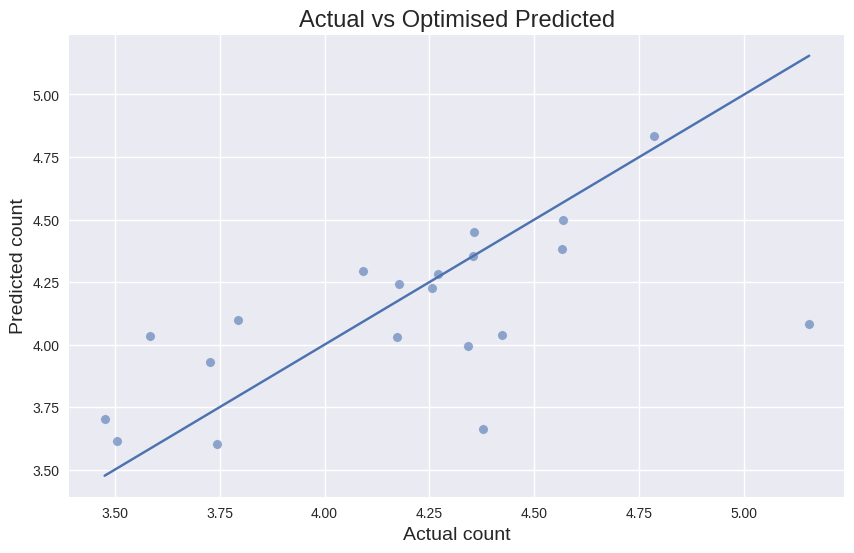

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
grid.score(X_test, Y_test)

0.32926873155953595

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.35

In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.8797


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.2399


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.3509


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.3546


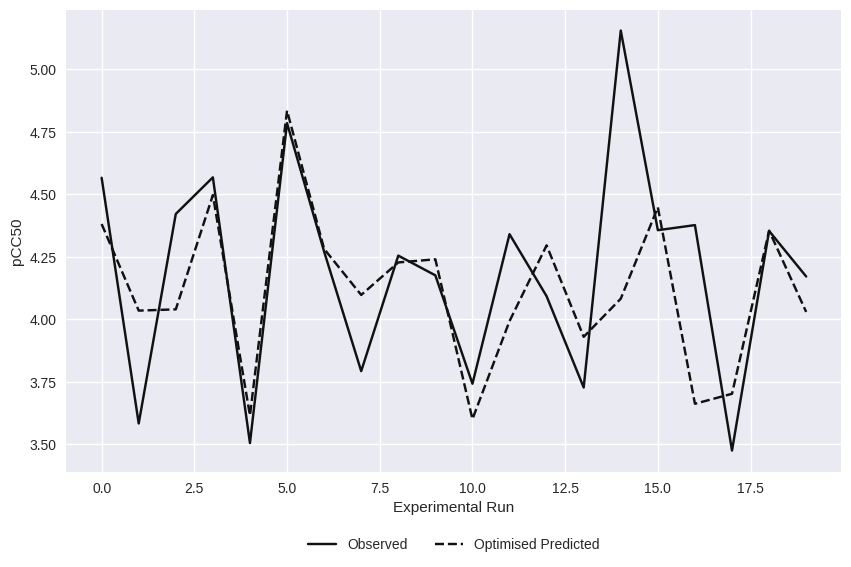

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([4.47572113, 3.97441808, 4.29914866, 3.45378649, 3.7909726 ,
       3.95648819, 4.91473166, 4.49654706, 3.72583871, 4.40496747,
       4.36181277, 4.55082812, 4.68813298, 4.42311185, 4.59091714,
       4.47516316, 3.52189523, 3.47927428, 4.49569884, 4.04907003,
       4.68370414, 4.36451571, 4.39329149, 4.70305307, 3.72091813,
       3.44315773, 3.46122688, 3.574859  , 4.544091  , 3.83837965,
       3.72471122, 3.86773109, 3.58491572, 4.7527656 , 4.30068108,
       3.52381195, 4.50599158, 3.46411466, 4.45814465, 4.00350767,
       3.79891163, 4.30847122, 3.79263152, 3.67164959, 4.46312499,
       3.66602164, 4.50677776, 3.4951735 , 4.53059499, 4.38297199,
       4.57969131, 4.28983564, 4.457304  , 3.9724585 , 3.98569154,
       4.38136485, 3.83175782, 3.92211592, 4.59091433, 4.45922239,
       4.46189169, 3.96320553, 4.27557553, 4.00447773, 3.78707201,
       4.34828333, 4.40566996, 3.66732818, 4.43660573, 4.09003295,
       4.06320895, 3.88792547, 3.70061879, 4.23365687, 4.37340

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
55,4.479516,4.377958,4.475721
88,3.980344,3.958753,3.974418
26,4.311580,3.988596,4.299149
42,3.454174,3.544530,3.453786
69,3.797239,3.734311,3.790973


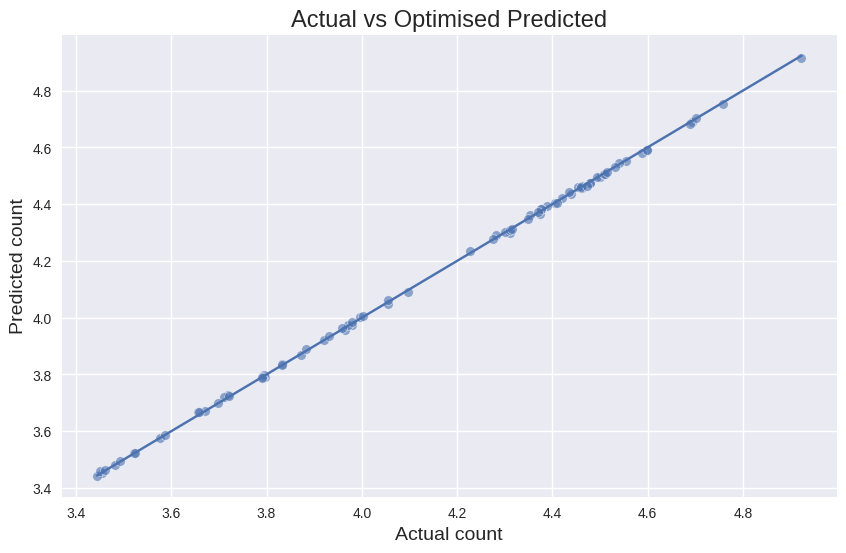

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.9214


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.0044


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.0053


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.9998


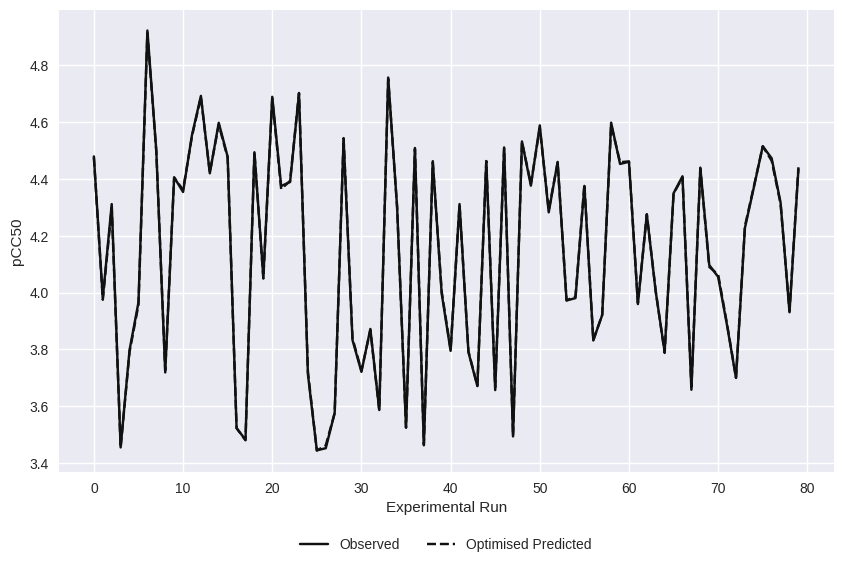

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

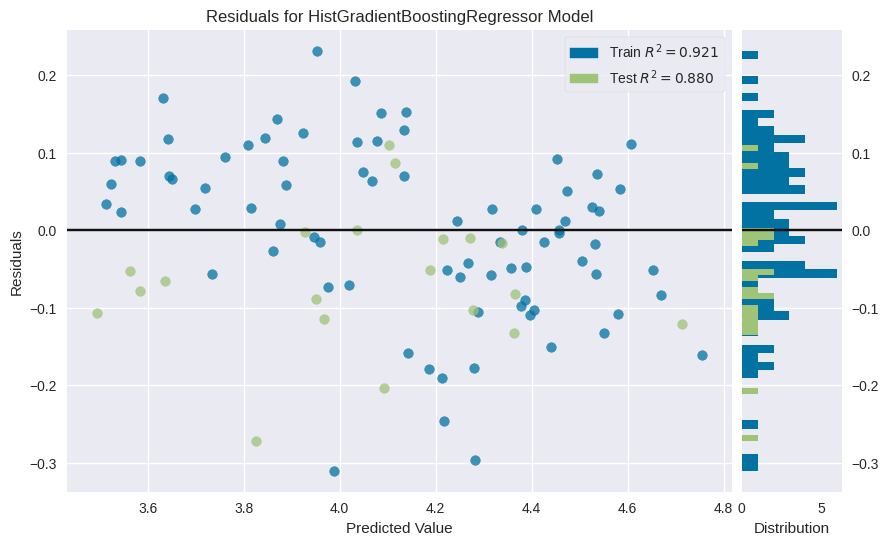

<Axes: title={'center': 'Residuals for HistGradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train_optimised)
visualizer.score(X_test, Y_test_optimised)
visualizer.poof()

In [ ]:
features = list(X_train.columns)

In [ ]:
features

['ATS4v',
 'ATS7v',
 'ATS6i',
 'AATS6m',
 'AATS3e',
 'ATSC8m',
 'ATSC1v',
 'ATSC5v',
 'ATSC3e',
 'ATSC8e',
 'ATSC4i',
 'AATSC3m',
 'AATSC6m',
 'AATSC1v',
 'AATSC7v',
 'AATSC2e',
 'AATSC8e',
 'AATSC6p',
 'MATS1c',
 'MATS2c',
 'MATS3c',
 'MATS7c',
 'MATS1m',
 'MATS7m',
 'MATS3e',
 'MATS4e',
 'MATS6e',
 'MATS7e',
 'MATS8e',
 'MATS3p',
 'MATS4p',
 'MATS6p',
 'GATS4m',
 'GATS6m',
 'GATS2v',
 'GATS6v',
 'GATS8v',
 'GATS7e',
 'GATS7p',
 'GATS7i',
 'Sp',
 'CrippenLogP',
 'SpMAD_Dt',
 'IC2',
 'CIC3',
 'ZMIC4',
 'piPC8',
 'piPC9',
 'WTPT-5',
 'XLogP']

In [ ]:
GBR = GradientBoostingRegressor(random_state=seed, max_leaf_nodes=8, max_depth=7, min_samples_leaf=3)

NameError: ignored

In [ ]:
GBR.fit(X_train, Y_train)

In [ ]:
importance = HGBR.feature_im
importance

In [ ]:
importance = GBR.feature_importances_
importance

In [ ]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

In [ ]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(10,20))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap
X = df2.drop(['pCC50'],axis = 1)
explainer = shap.TreeExplainer(model,feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X)

In [ ]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X,show=False,color_bar=False)
plt.xlabel("SHAP value of pCC50 model" ,fontweight='bold',fontsize=6)
plt.tick_params(labelsize=6,)
plt.show()